In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [27]:
# Load training data
train = pd.read_csv('data/cleaned_data_train.csv')
test = pd.read_csv('data/cleaned_data_test.csv')

train = train.drop(columns=['Sample'])
test = test.drop(columns=['Sample'])

X_train = train.drop(columns=['Cancer'])
y_train = train['Cancer']

X_test = test.drop(columns=['Cancer'])
y_test = test['Cancer']

print(X_train.shape)
print(X_test.shape)

# Check the distribution of the target variable
print(y_train.value_counts())
print(y_test.value_counts())


(228, 57736)
(57, 57736)
Cancer
True     180
False     48
Name: count, dtype: int64
Cancer
True     50
False     7
Name: count, dtype: int64


In [28]:
# Check the shape of X_train to get the correct input dimension
input_dim = X_train.shape[1]

# Define the model
model = Sequential()

# Input layer with L2 regularization
model.add(Dense(512, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

# Hidden layers with L2 regularization
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a slightly higher learning rate
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Summary of the model
model.summary()

/Users/liuruichen/Developer/2024/CS506/CS506_Final_Project/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 512)            │    29,561,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,733,889 (113.43 MB)

 Trainable params: 29,733,889 (113.43 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.4393 - loss: 2.5904 - val_accuracy: 0.7174 - val_loss: 2.3291
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8170 - loss: 1.9671 - val_accuracy: 0.7391 - val_loss: 2.1156
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8689 - loss: 1.7602 - val_accuracy: 0.7391 - val_loss: 1.9852
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.8830 - loss: 1.6250 - val_accuracy: 0.7391 - val_loss: 1.9305
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9052 - loss: 1.5412 - val_accuracy: 0.7391 - val_loss: 1.9286
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9425 - loss: 1.4381 - val_accuracy: 0.7174 - val_loss: 1.9814
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9394 - loss: 1.4221 - val_accuracy: 0.7174 - val_loss: 1.9714
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9702 - loss: 1.2987 - val_accuracy: 0.7174 - val_loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


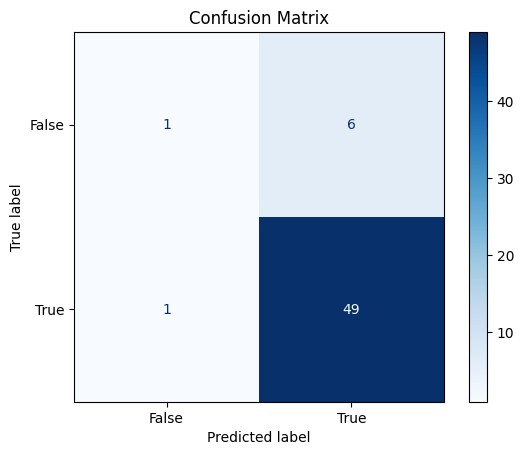

In [30]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()